## FPG Standard Deviation 

The purpose of this notebook is to pull in the FPG standard deviation values and then create a function that replaces values which are over a certain limit

### Pull in the 2019 FPG standard deviation values 

Note that the 2021 values are not terribly different and this code should be able to be used with just changing to release_id 9

In [4]:
import pandas as pd, numpy as np, os
from db_queries import get_ids, get_outputs, get_location_metadata, get_population, get_covariate_estimates
from get_draws.api import get_draws
import matplotlib.pyplot as plt
import random

In [2]:
fpg_std = get_draws(release_id=6,
         year_id=2019,
         sex_id=[1,2],
         location_id=523,
         age_group_id=[10,11,12,13,14,15,16,17,18,19,20,30,31,32],
         gbd_id_type='modelable_entity_id',
         gbd_id=18705,
         source='epi')

In [3]:
data = fpg_std.set_index(['sex_id','modelable_entity_id','age_group_id'])
data = (data[[c for c in data.columns if 'draw' in c]].stack().reset_index()
        .rename(columns={'level_3':'draw',0:'value'}))
data = (data.pivot_table(index=['sex_id','age_group_id','draw'], columns='modelable_entity_id', values='value')
        .reset_index())
data = data.rename(columns={18705:'standard_deviation'})
data.head()

modelable_entity_id,sex_id,age_group_id,draw,standard_deviation
0,1,10,draw_0,0.601520
1,1,10,draw_1,0.605787
2,1,10,draw_10,0.631223
3,1,10,draw_100,0.582807
4,1,10,draw_101,0.660404


Text(0.5, 1.0, 'Standard Deviation by Age Group')

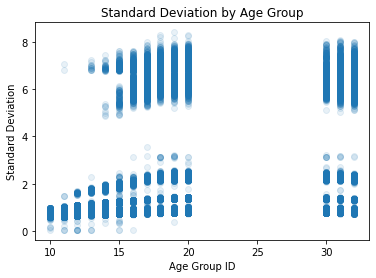

In [5]:
plt.scatter(data.age_group_id, data.standard_deviation, alpha=0.1)
plt.xlabel("Age Group ID")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation by Age Group") 

Text(0, 0.5, 'Counts')

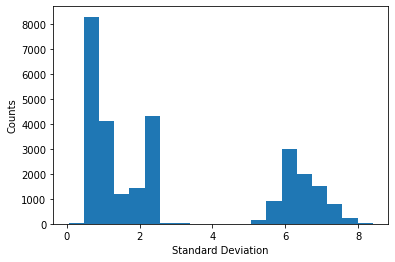

In [6]:
plt.hist(data.standard_deviation, bins=20)
plt.xlabel("Standard Deviation")
plt.ylabel("Counts")

Text(0.5, 1.0, 'Standard Deviation for 80-84')

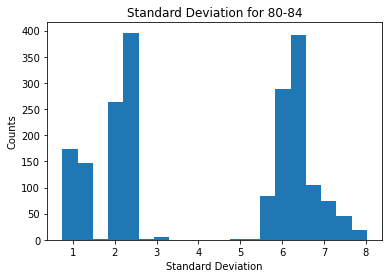

In [11]:
data1 = data.loc[data.age_group_id == 30]
plt.hist(data1.standard_deviation, bins=20)
plt.xlabel("Standard Deviation")
plt.ylabel("Counts")
plt.title("Standard Deviation for 80-84") 

Text(0.5, 1.0, 'Standard Deviation for 35-39')

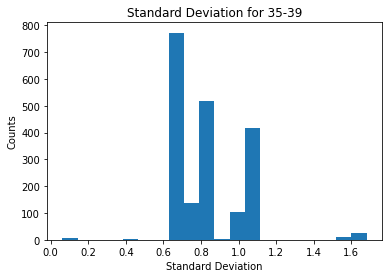

In [15]:
data1 = data.loc[data.age_group_id == 12]
plt.hist(data1.standard_deviation, bins=20)
plt.xlabel("Standard Deviation")
plt.ylabel("Counts")
plt.title("Standard Deviation for 35-39") 

### Comparing to NHANES Data

In [6]:
nhanes_fpg_std = pd.read_csv('/ihme/homes/lutzes/fpg_std_nhanes.csv')

In [11]:
nhanes_fpg_std = nhanes_fpg_std.drop(columns=['Unnamed: 0'])
nhanes_fpg_std

,sex_id,age_start,age_end,fpg_std,count_nonmiss
0,1,25,30,1.228449,997
1,2,25,30,1.214588,1200
2,1,30,35,1.572350,1046
3,2,30,35,1.356011,1238
4,1,35,40,1.857181,983
5,2,35,40,1.717059,1165
6,1,40,45,2.171385,1014
7,2,40,45,1.993145,1135
8,1,45,50,1.902760,968
9,2,45,50,1.981521,966


<AxesSubplot:xlabel='age_start', ylabel='fpg_std'>

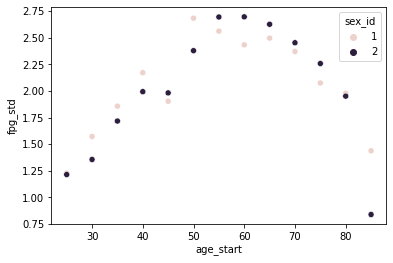

In [14]:
import seaborn as sns
sns.scatterplot(data=nhanes_fpg_std, x='age_start', y='fpg_std', hue='sex_id')
